https://www.cs.cmu.edu/~schneide/tut5/node42.html

https://www.turing.com/kb/different-types-of-cross-validations-in-machine-learning-and-their-explanations

In [1]:
import pandas as pd
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV, cross_val_score, cross_val_predict, train_test_split,StratifiedKFold, LeavePOut
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import warnings


warnings.filterwarnings('ignore')

In [2]:
data = pd.read_pickle('Churn_Modelling.pkl')

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [4]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
X = data.iloc[:,3:13].values
y = data.iloc[:,13].values

In [36]:
 data.iloc[:,13].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
#labelencoder_X_1 = LabelEncoder()
#X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
#
#labelencoder_X_2 = LabelEncoder()
#X[:,2] = labelencoder_X_2.fit_transform(X[:,2])
#
#onehotencoder = OneHotEncoder(categorical_features = [1])
#
#X = onehotencoder.fit_transform(X).toarray()

In [9]:
from sklearn.compose import ColumnTransformer
categorical_features = [1, 2] 

column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  
)

# Verilerinizi dönüştürün
X = column_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [10]:
xgb = XGBClassifier(objective='binary:logistic',reg_lambda = 10, scale_pos_weight = 3, subsample = 0.9, colsample_bytree= 0.5, n_estimators = 200, learning_rate = 0.1, seed = 42)
xgb.fit(X_train, y_train,verbose=True,early_stopping_rounds = 40, eval_metric = 'aucpr', eval_set=[(X_test, y_test)])

y_pred = xgb.predict(X_test)

[0]	validation_0-aucpr:0.43852
[1]	validation_0-aucpr:0.46161
[2]	validation_0-aucpr:0.52647
[3]	validation_0-aucpr:0.51171
[4]	validation_0-aucpr:0.52712
[5]	validation_0-aucpr:0.51973
[6]	validation_0-aucpr:0.51665
[7]	validation_0-aucpr:0.52283
[8]	validation_0-aucpr:0.52463
[9]	validation_0-aucpr:0.58818
[10]	validation_0-aucpr:0.58555
[11]	validation_0-aucpr:0.62134
[12]	validation_0-aucpr:0.65245
[13]	validation_0-aucpr:0.64955
[14]	validation_0-aucpr:0.66382
[15]	validation_0-aucpr:0.67673
[16]	validation_0-aucpr:0.68444
[17]	validation_0-aucpr:0.68912
[18]	validation_0-aucpr:0.68682
[19]	validation_0-aucpr:0.68936
[20]	validation_0-aucpr:0.69145
[21]	validation_0-aucpr:0.69243
[22]	validation_0-aucpr:0.69008
[23]	validation_0-aucpr:0.69284
[24]	validation_0-aucpr:0.69318
[25]	validation_0-aucpr:0.69403
[26]	validation_0-aucpr:0.69388
[27]	validation_0-aucpr:0.69486
[28]	validation_0-aucpr:0.69720
[29]	validation_0-aucpr:0.69666
[30]	validation_0-aucpr:0.69717
[31]	validation_0-

In [11]:
conf_matrix = confusion_matrix(y_pred, y_test)

print(conf_matrix)
print(classification_report(y_pred, y_test))

[[1397  111]
 [ 210  282]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1508
           1       0.72      0.57      0.64       492

    accuracy                           0.84      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.83      0.84      0.83      2000



In [12]:
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(xgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(xgb.score(X_test, y_test)))

Classification accuracy : 0.8395
Training set score: 0.8586
Test set score: 0.8395


<Axes: >

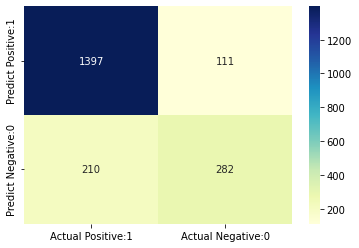

In [13]:
plt.figure(figsize=(6,4))

conf_matrix_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Applying 5-Fold Cross Validation


In [16]:
cv = 5
scores = cross_val_score(xgb, X, y, cv = 5, scoring='accuracy')

print(f'{cv}' + ' fold Cross-validation scores:{}'.format(scores))

5 fold Cross-validation scores:[0.8385 0.844  0.8255 0.845  0.8405]


#### Applying 10-Fold Cross Validation


In [17]:
cv = 10
scores = cross_val_score(xgb, X, y, cv = 10, scoring='accuracy')

print(f'{cv}' + ' fold Cross-validation scores:{}'.format(scores))

10 fold Cross-validation scores:[0.843 0.837 0.84  0.832 0.838 0.83  0.836 0.838 0.845 0.834]


###  Stratified K-fold Cross Validation
nispeten daha az train datamız varsa ve class ratio protection yapmak istiyorsak mantıklı. Veri dağılımı dengesizse iyi iş görüyor. 

In [18]:
st_kf_cv = StratifiedKFold(n_splits=5)
score = cross_val_score(xgb,X, y, cv = st_kf_cv)
print('Stratified K-fold Cross Validation Score: {}'.format(score))
print('Average Cross Validation Score: {}'.format(score.mean()))

Stratified K-fold Cross Validation Score: [0.8385 0.844  0.8255 0.845  0.8405]
Average Cross Validation Score: 0.8387


#### Repeated K-fold Cross Validation
Repeated k-fold cross validation is k-fold cross validation done more than once. We run a  k
  fold cross validation, and get a bunch of results; then we independently pick new folds, and repeat the process again, generating another  k
  results, and so on.

Repeated k-fold is useful for datasets where the number of observations available to us is relatively lo

In [19]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state = None)

scores = cross_val_score(xgb, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
print('Repeated K-fold Cross Validation: %.3f (%.4f)' % (mean(scores), std(scores)))

Repeated K-fold Cross Validation: 0.834 (0.0122)


In [159]:
# Leave-One-Out Cross-Validation k-fold cross validation'ın aslında k = number of sample sayısı kadar olanıdır. 
# Büyük datasetlerde kullanmak çok tehlikeli çünkü O(n) çok fazla olabilir
loo = LeaveOneOut()
print(X.shape)

scores = cross_val_score(xgb, X, y, scoring='accuracy', cv=loo, n_jobs=-1)
# report performance
print('LOOCV Score: %.4f' % (mean(scores), std(scores)))

# çalıştırırken pcye dikkat edin :d

(10000, 13)


KeyboardInterrupt: 

AUC Score: 0.8686226448853694


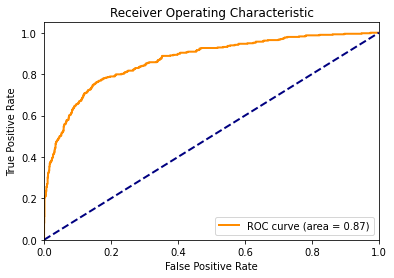

In [20]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = xgb.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Farklı bir XGBClassifier modeli daha kuralım. Taamamen farklı parametreler ile

In [21]:
xgb_2 = XGBClassifier(n_estimators = 100, learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')

xgb_2.fit(X_train, y_train)

y_pred = xgb_2.predict(X_test)

In [22]:
conf_matrix = confusion_matrix(y_pred, y_test)

print(conf_matrix)
print(classification_report(y_pred, y_test))

[[1537  205]
 [  70  188]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1742
           1       0.48      0.73      0.58       258

    accuracy                           0.86      2000
   macro avg       0.72      0.81      0.75      2000
weighted avg       0.89      0.86      0.87      2000



In [23]:
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(xgb_2.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(xgb_2.score(X_test, y_test)))

Classification accuracy : 0.8625
Training set score: 0.8994
Test set score: 0.8625


<Axes: >

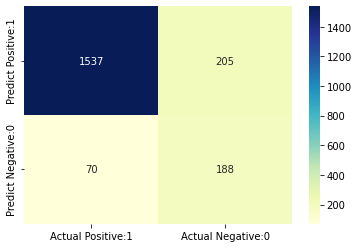

In [24]:
plt.figure(figsize=(6,4))

conf_matrix_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [25]:
#### Applying 5-Fold Cross Validation
cv = 5
scores = cross_val_score(xgb_2, X, y, cv = 5, scoring='accuracy')

print(f'{cv}' + ' fold Cross-validation scores:{}'.format(scores))


5 fold Cross-validation scores:[0.865  0.87   0.859  0.867  0.8565]


In [26]:
#### Applying 10-Fold Cross Validation
cv = 10
scores = cross_val_score(xgb_2, X, y, cv = 10, scoring='accuracy')

print(f'{cv}' + ' fold Cross-validation scores:{}'.format(scores))

10 fold Cross-validation scores:[0.877 0.86  0.87  0.868 0.859 0.854 0.857 0.875 0.855 0.855]


In [27]:
st_kf_cv = StratifiedKFold(n_splits=5)
score = cross_val_score(xgb_2,X, y, cv = st_kf_cv)
print('Stratified K-fold Cross Validation Score: {}'.format(score))
print('Average Cross Validation Score: {}'.format(score.mean()))

Stratified K-fold Cross Validation Score: [0.865  0.87   0.859  0.867  0.8565]
Average Cross Validation Score: 0.8634999999999999


In [28]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state = None)

scores = cross_val_score(xgb_2, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
print('Average Cross Validation Score: {}'.format(scores))
print('Repeated K-fold Cross Validation Mean: %.4f std: %.4f' % (mean(scores), std(scores)))

Average Cross Validation Score: [0.866 0.864 0.873 0.87  0.841 0.865 0.874 0.859 0.863 0.861 0.863 0.855
 0.865 0.852 0.866 0.872 0.84  0.869 0.867 0.881 0.867 0.867 0.84  0.854
 0.857 0.845 0.877 0.873 0.876 0.852 0.85  0.85  0.87  0.87  0.867 0.866
 0.867 0.861 0.85  0.866 0.852 0.878 0.881 0.886 0.869 0.865 0.861 0.858
 0.855 0.834]
Repeated K-fold Cross Validation Mean: 0.8626 std: 0.0113


In [160]:
# Leave-One-Out Cross-Validation k-fold cross validation'ın aslında k = number of sample sayısı kadar olanıdır. 
# Büyük datasetlerde kullanmak çok tehlikeli çünkü O(n) çok fazla olabilir
loo = LeaveOneOut()
print(X.shape)

scores = cross_val_score(xgb_2, X, y, scoring='accuracy', cv=loo, n_jobs=-1)
# report performance
print('LOOCV Score: %.4f' % (mean(scores), std(scores)))

(10000, 13)


KeyboardInterrupt: 

AUC Score: 0.8684492622131863


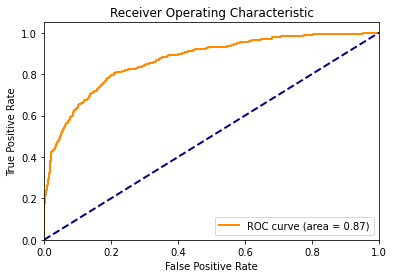

In [29]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = xgb_2.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()